**This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.**

In [1]:
import pandas as pd 
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import  StandardScaler,LabelEncoder
import pickle

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
## Data Preprocessing
##Drope irrelevant Features
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Two Categorical Features are present in this dataset**

In [6]:
#Encode Categorical features
label_encod_gender=LabelEncoder()
data['Gender']=label_encod_gender.fit_transform(data['Gender'])

In [7]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
#One hot encode Geography column
from sklearn.preprocessing import  OneHotEncoder
onehot_encode_geography=OneHotEncoder()
geo_encoder=onehot_encode_geography.fit_transform(data[['Geography']]).toarray()
geo_encoder                         

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [9]:
encoded_columns=onehot_encode_geography.get_feature_names_out(['Geography'])
encoded_columns

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [10]:
geography_encoad_df=pd.DataFrame(geo_encoder,columns=encoded_columns)

In [11]:
#combine att the columns 
data=pd.concat([data.drop('Geography',axis=1),geography_encoad_df],axis=1)

In [12]:
## save the encoder 
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encod_gender,file)


with open('onehot_encode_geography.pkl','wb') as file :
    pickle.dump(onehot_encode_geography,file)    

In [13]:
# Independent and dependent Features  
X=data.drop(['Exited'],axis=1)
y=data['Exited']

In [14]:
#Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
#scaled the data 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [17]:
#save the scaler 
with open ('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### Implimentation of ANN

In [18]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #Dense is used for create hidden neurons.
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime


In [19]:
X_train.shape[1],

(12,)

In [20]:
# ANN model build 
model=Sequential( 
    [
        Dense(64,activation='relu',input_shape=(X_train.shape[1],)),# HL1 connected with input layer
        Dense(32,activation='relu'),#HL2
        Dense(1,activation='sigmoid')#Output layer
    ]
)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)#Optimizer

loss=tensorflow.keras.losses.BinaryCrossentropy() #Loss Function


In [23]:
#compile the model 
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [24]:
# setup the Tensorboard 
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [25]:
#setup Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [26]:
# Model Tranning 
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8125 - loss: 0.4433 - val_accuracy: 0.8615 - val_loss: 0.3504
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3579 - val_accuracy: 0.8605 - val_loss: 0.3453
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3427 - val_accuracy: 0.8550 - val_loss: 0.3513
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8635 - loss: 0.3360 - val_accuracy: 0.8570 - val_loss: 0.3449
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.3339 - val_accuracy: 0.8565 - val_loss: 0.3605
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8647 - loss: 0.3348 - val_accuracy: 0.8585 - val_loss: 0.3412
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3280 - val_accuracy: 0.8615 - val_loss: 0.3421
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3280 - val_accu

In [27]:
model.save('model.h5')

In [28]:
# Load TensorBoard Extention 
%load_ext tensorboard

In [44]:
%tensorboard --logdir logs/fit20240904-152817


Reusing TensorBoard on port 6006 (pid 6664), started 0:00:58 ago. (Use '!kill 6664' to kill it.)

In [32]:
history.history

{'accuracy': [0.8348749876022339,
  0.8536249995231628,
  0.8569999933242798,
  0.8586249947547913,
  0.8601250052452087,
  0.8619999885559082,
  0.8647500276565552,
  0.8651250004768372,
  0.8653749823570251,
  0.8669999837875366,
  0.8671249747276306,
  0.8672500252723694,
  0.8677499890327454,
  0.8697500228881836,
  0.8716250061988831,
  0.8692499995231628],
 'loss': [0.39554986357688904,
  0.3548342287540436,
  0.34949859976768494,
  0.34509003162384033,
  0.339463472366333,
  0.33694934844970703,
  0.3343657851219177,
  0.3338916599750519,
  0.3307919204235077,
  0.32736119627952576,
  0.3287714123725891,
  0.32394254207611084,
  0.3240085542201996,
  0.3201293647289276,
  0.3160301446914673,
  0.319867879152298],
 'val_accuracy': [0.8615000247955322,
  0.8604999780654907,
  0.8550000190734863,
  0.8569999933242798,
  0.8565000295639038,
  0.8585000038146973,
  0.8615000247955322,
  0.8539999723434448,
  0.8610000014305115,
  0.8535000085830688,
  0.8569999933242798,
  0.85650002

C:\Users\acer\AppData\Local\Temp\ipykernel_16172\4052643146.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
C:\Users\acer\AppData\Local\Temp\ipykernel_16172\4052643146.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


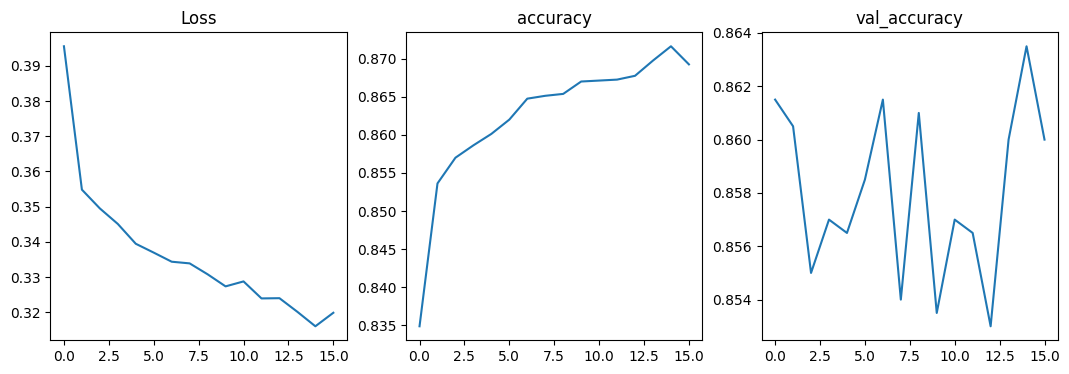

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axs = plt.subplots(1,2, figsize=(13, 4))
plt.subplot(131)
sns.lineplot(history.history['loss'])
plt.title('Loss')

plt.subplot(132)
sns.lineplot(history.history['accuracy'])
plt.title('accuracy')

plt.subplot(133)
sns.lineplot(history.history['val_accuracy'])
plt.title('val_accuracy')
plt.show()